# Initial

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 8)

## Data

<AxesSubplot:title={'center':'Airline passengers'}, xlabel='Month'>

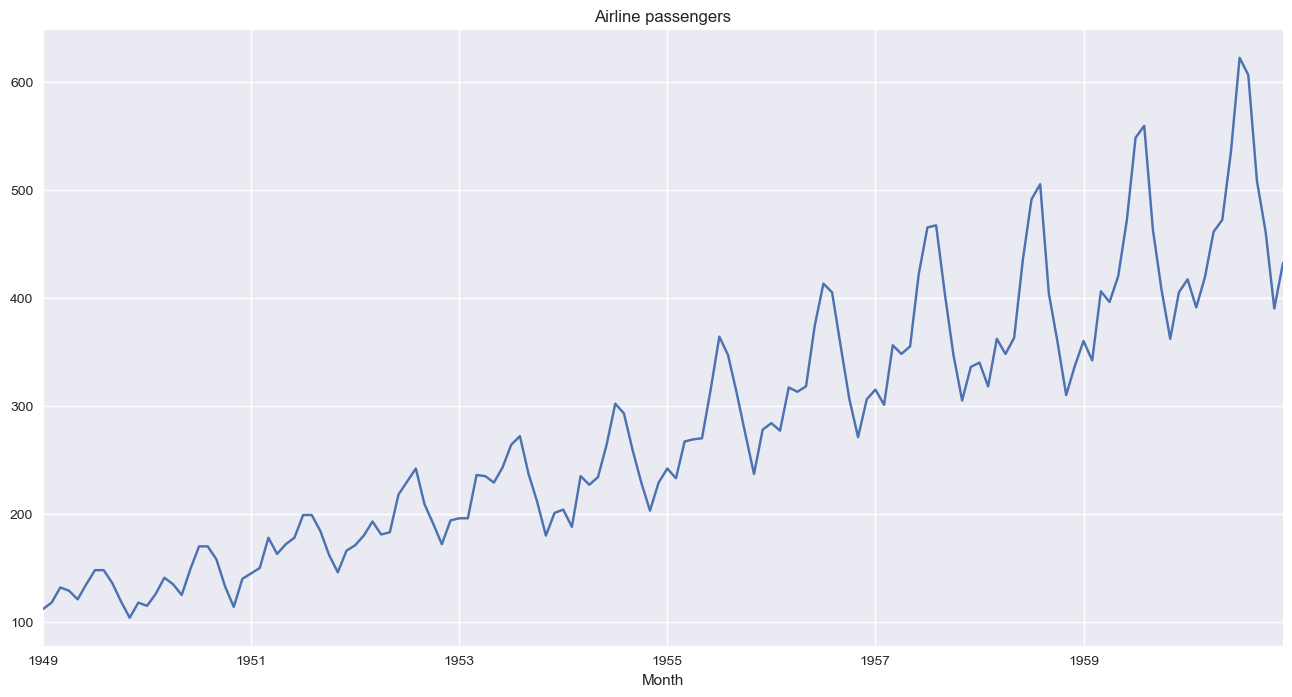

In [2]:
df = pd.read_csv("data/air_passengers.csv", index_col=0)
df.index = pd.to_datetime(df.index)
y = df["Passengers"]
y.name = "n_passengers"

y.plot(title="Airline passengers")

## Benchmark from `statsmodels`

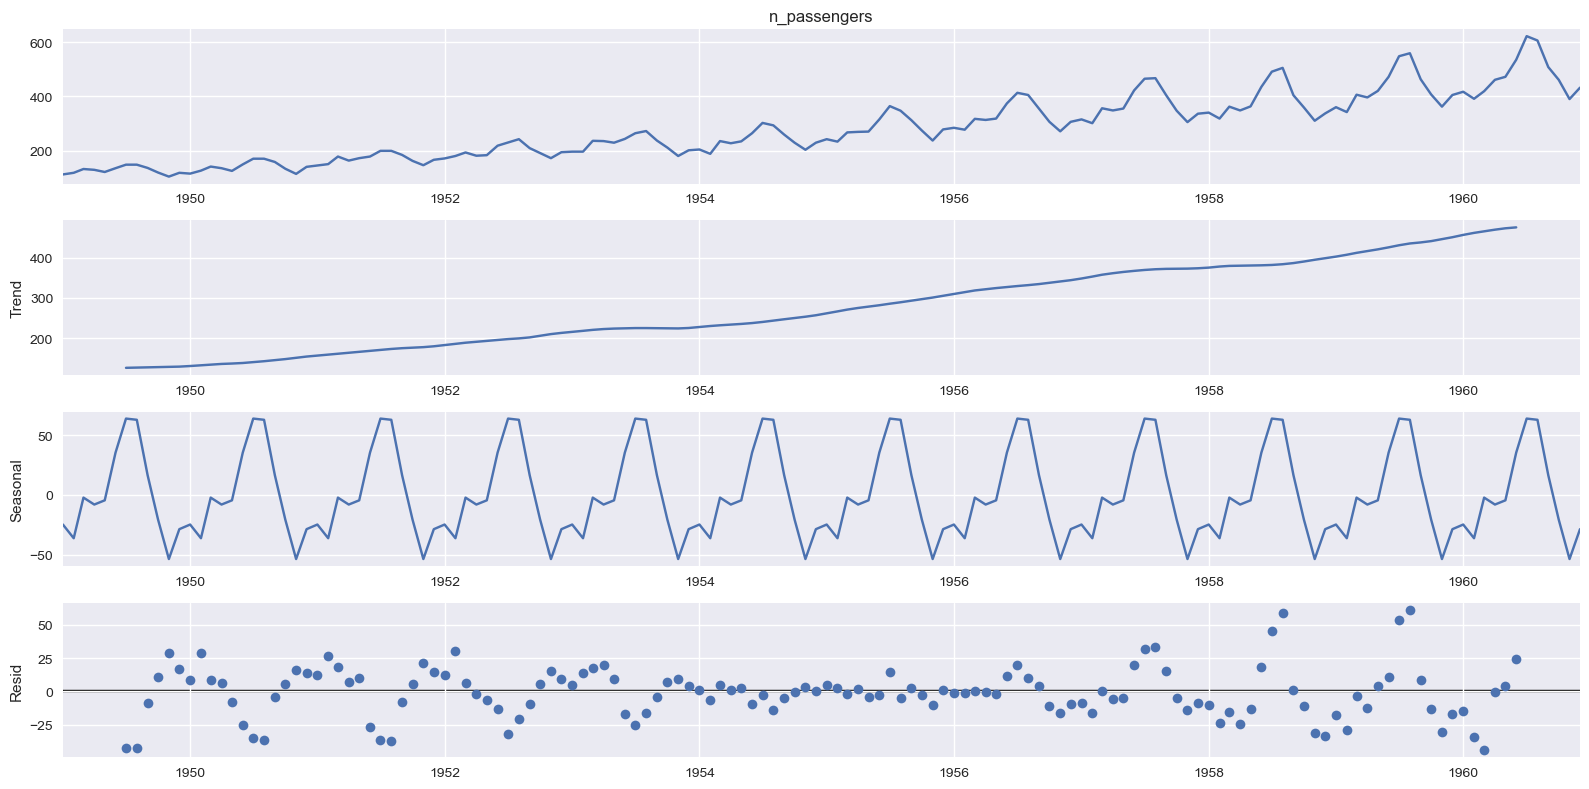

In [3]:
seasonal_decomp = seasonal_decompose(y, model="additive")
seasonal_decomp.plot();

# Decomposition

1. **Additive Decomposition:** Additive decomposition breaks down a time series into three components: trend, seasonal and residual. Represented by Y(t) = T(t) + S(t) + R(t), where Y(t) is the observed time series, T(t) is the trend, S(t) is the seasonal and R(t) is the residual.
2. **Multiplicative Decomposition:** Multiplicative decomposition breaks down a time series into trend, seasonal, and residual components. The model is represented by Y(t) = T(t) * S(t) * R(t), where Y(t) is the observed series, T(t) is the trend, S(t) is the seasonal, and R(t) is the residual.

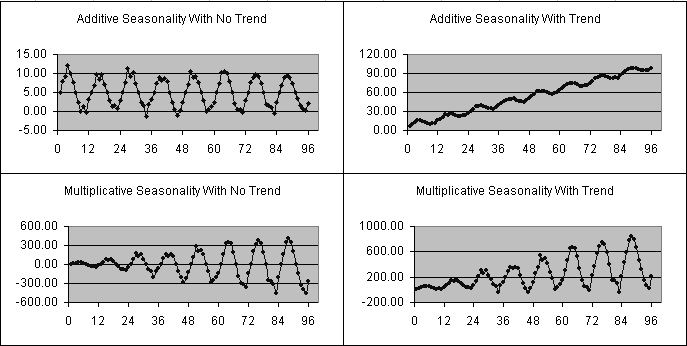

# Basic Parts

## Trend
A trend is a long-term increase or decrease in the data. It represents a consistent change in the mean of the series over time. Trends can be either linear or non-linear, and can be positive (increasing), negative (decreasing), or none (constant). Identifying the trend in a time series is important for understanding the overall direction of the series and for making predictions about future values.

In [4]:
seasonal_df = y.to_frame()
seasonal_df

,n_passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
seasonal_df["trend"] = seasonal_df["n_passengers"].rolling(window=13, center=True).mean()
seasonal_df.head(10)

,n_passengers,trend
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,125.769231
1949-08-01,148,126.846154
1949-09-01,136,128.615385


In [6]:
seasonal_df.tail(10)

,n_passengers,trend
Month,,
1960-03-01,419,466.769231
1960-04-01,461,466.615385
1960-05-01,472,465.307692
1960-06-01,535,470.692308
1960-07-01,622,NaN
1960-08-01,606,NaN
1960-09-01,508,NaN
1960-10-01,461,NaN
1960-11-01,390,NaN


## Seasonality
Seasonality refers to regular patterns in the data that occur at specific intervals. For example, a retail store might see increased sales during the holiday season each year, or a temperature dataset might show a consistent pattern of temperature changes over the course of a year. Identifying seasonality is important for understanding how the data is affected by regular, cyclical factors and for making predictions about future values.

In [7]:
seasonal_df["detrended"] = seasonal_df["n_passengers"] - seasonal_df["trend"]
seasonal_df.head(10)

,n_passengers,trend,detrended
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,125.769231,22.230769
1949-08-01,148,126.846154,21.153846
1949-09-01,136,128.615385,7.384615


In [9]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)

,n_passengers,trend,detrended,month,seasonality
Month,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175
1949-02-01,118,NaN,NaN,2,-42.027972
1949-03-01,132,NaN,NaN,3,-4.139860
1949-04-01,129,NaN,NaN,4,-6.944056
1949-05-01,121,NaN,NaN,5,-0.699301
1949-06-01,135,NaN,NaN,6,37.146853
1949-07-01,148,125.769231,22.230769,7,64.923077
1949-08-01,148,126.846154,21.153846,8,64.580420
1949-09-01,136,128.615385,7.384615,9,15.636364


## Noise/Residual
Noise refers to the random variation in the data that is not explained by the trend or seasonality. It represents unpredictable fluctuations in the series that may or may not be meaningful. Noise can be caused by many factors such as measurement errors, external events or influences that are not captured by the trend and seasonality. Identifying noise can be important for understanding the uncertainty in the data and for making predictions about future values.

In [10]:
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]
seasonal_df.head(15)

,n_passengers,trend,detrended,month,seasonality,resid
Month,,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175,NaN
1949-02-01,118,NaN,NaN,2,-42.027972,NaN
1949-03-01,132,NaN,NaN,3,-4.139860,NaN
1949-04-01,129,NaN,NaN,4,-6.944056,NaN
1949-05-01,121,NaN,NaN,5,-0.699301,NaN
1949-06-01,135,NaN,NaN,6,37.146853,NaN
1949-07-01,148,125.769231,22.230769,7,64.923077,-42.692308
1949-08-01,148,126.846154,21.153846,8,64.580420,-43.426573
1949-09-01,136,128.615385,7.384615,9,15.636364,-8.251748


And all the steps above, combined into a single cell:

In [10]:
# create the DF
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["n_passengers"].rolling(window=13, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["n_passengers"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)

,n_passengers,trend,detrended,month,seasonality,resid
Month,,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175,NaN
1949-02-01,118,NaN,NaN,2,-42.027972,NaN
1949-03-01,132,NaN,NaN,3,-4.139860,NaN
1949-04-01,129,NaN,NaN,4,-6.944056,NaN
1949-05-01,121,NaN,NaN,5,-0.699301,NaN
1949-06-01,135,NaN,NaN,6,37.146853,NaN
1949-07-01,148,125.769231,22.230769,7,64.923077,-42.692308
1949-08-01,148,126.846154,21.153846,8,64.580420,-43.426573
1949-09-01,136,128.615385,7.384615,9,15.636364,-8.251748


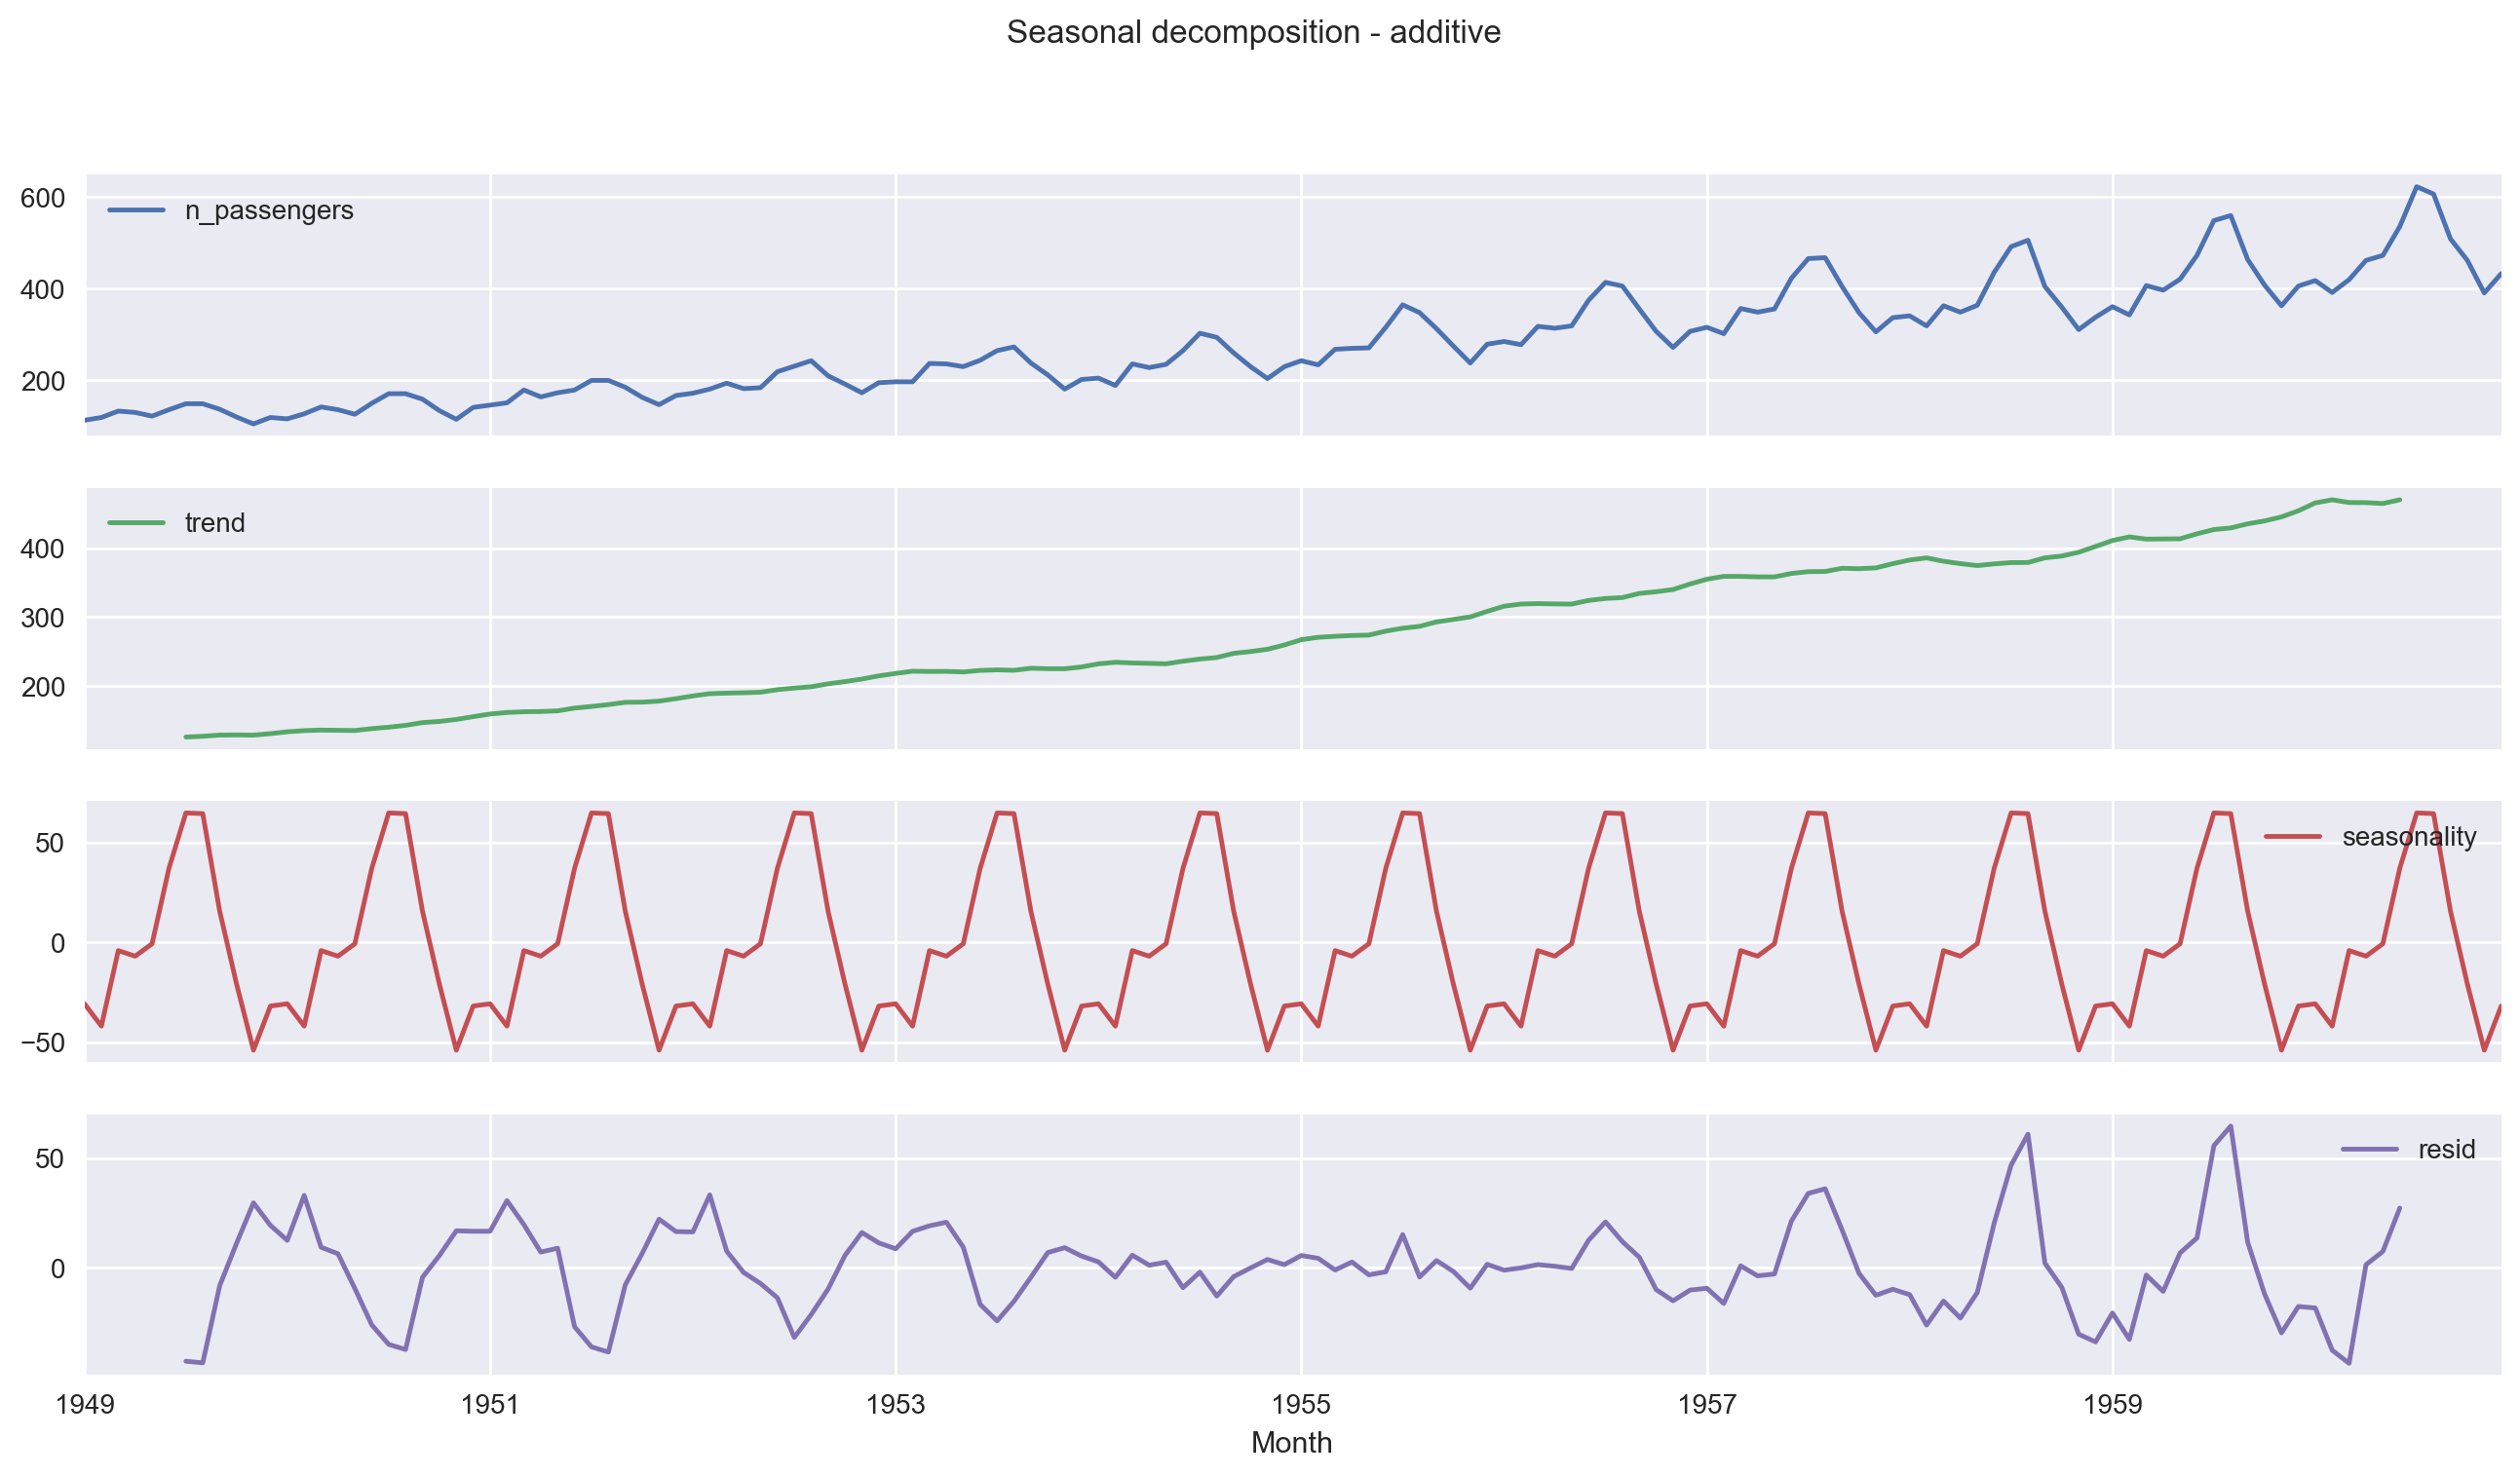

In [11]:
(
    seasonal_df
    .loc[:, ["n_passengers", "trend", "seasonality", "resid"]]
    .plot(subplots=True, title="Seasonal decomposition - additive")
);